# Triage Troopers Code

In [1]:
# mount drive for access
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import re

In [3]:
# Open dataset
df = pd.read_csv("/content/drive/Shareddrives/BE 5740 - Final Project/Triage Dataset - Original.xlsx - N=1267 data.csv",sep=',')
df.head()

,Group,Sex,Age,Patients number per hour,Arrival mode,Injury,Chief_complain,Mental,Pain,NRS_pain,...,BT,Saturation,KTAS_RN,Diagnosis in ED,Disposition,KTAS_expert,Error_group,Length of stay_min,KTAS duration_min,mistriage
0,2,2,71,3,3,2,right ocular pain,1,1,2,...,36.6,100,2,Corneal abrasion,1,4,2,86,5.00,1
1,1,1,56,12,3,2,right forearm burn,1,1,2,...,36.5,NaN,4,"Burn of hand, firts degree dorsum",1,5,4,64,3.95,1
2,2,1,68,8,2,2,"arm pain, Lt",1,1,2,...,36.6,98,4,"Fracture of surgical neck of humerus, closed",2,5,4,862,1.00,1
3,1,2,71,8,1,1,ascites tapping,1,1,3,...,36.5,NaN,4,Alcoholic liver cirrhosis with ascites,1,5,6,108,9.83,1
4,1,2,58,4,3,1,"distension, abd",1,1,3,...,36.5,NaN,4,Ascites,1,5,8,109,6.60,1


In [4]:
df.shape

(1267, 24)

# Data Preprocessing

In [5]:
# Analyze the missing values in a DataFrame and provides a summary table and output a list

def missing_values_table(dataframe):
    # Replace '#NULL!' with NaN
    dataframe.replace("#NULL!", np.nan, inplace=True)

    variables_with_na = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[variables_with_na].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[variables_with_na].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df)
    return variables_with_na

#usage:
missing_values_table(df)

                 n_miss  ratio
Saturation          688  54.30
NRS_pain            556  43.88
Diagnosis in ED       2   0.16


['NRS_pain', 'Saturation', 'Diagnosis in ED']

In [6]:
## Fill in missing values in the NRS_pain, Saturation, and Diagnosis in ED columns of a DataFrame (df)
## based on the mode (most frequent value) within groups defined by two other columns (mistriage and KTAS_expert)
## ensures that the filled values are representative of each subgroup rather than just using the overall mode of the entire column

df["NRS_pain"] = df.groupby(["mistriage", "KTAS_expert"])["NRS_pain"].transform(lambda x: x.fillna(x.mode()[0]))
df["Saturation"] = df.groupby(["mistriage", "KTAS_expert"])["Saturation"].transform(lambda x: x.fillna(x.mode()[0]))
df["Diagnosis in ED"] = df.groupby(["mistriage", "KTAS_expert"])["Diagnosis in ED"].transform(lambda x: x.fillna(x.mode()[0]))

df

,Group,Sex,Age,Patients number per hour,Arrival mode,Injury,Chief_complain,Mental,Pain,NRS_pain,...,BT,Saturation,KTAS_RN,Diagnosis in ED,Disposition,KTAS_expert,Error_group,Length of stay_min,KTAS duration_min,mistriage
0,2,2,71,3,3,2,right ocular pain,1,1,2,...,36.6,100,2,Corneal abrasion,1,4,2,86,5.00,1
1,1,1,56,12,3,2,right forearm burn,1,1,2,...,36.5,98,4,"Burn of hand, firts degree dorsum",1,5,4,64,3.95,1
2,2,1,68,8,2,2,"arm pain, Lt",1,1,2,...,36.6,98,4,"Fracture of surgical neck of humerus, closed",2,5,4,862,1.00,1
3,1,2,71,8,1,1,ascites tapping,1,1,3,...,36.5,98,4,Alcoholic liver cirrhosis with ascites,1,5,6,108,9.83,1
4,1,2,58,4,3,1,"distension, abd",1,1,3,...,36.5,98,4,Ascites,1,5,8,109,6.60,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,2,2,79,5,2,1,mental change,1,0,3,...,36.4,95,2,Cerebral infarction due to unspecified occlusi...,2,2,0,1995,3.00,0
1263,2,2,81,2,3,1,dysuria,1,0,3,...,36.4,97,4,Dysuria,1,4,0,1000,2.00,0
1264,2,2,81,17,2,1,dizziness,1,0,5,...,36.2,99,3,Dizziness and giddiness,1,3,0,310,4.00,0
1265,2,1,81,2,2,2,"Sensory, Decreased",1,0,5,...,36.6,98,3,"Cord compression, unspecified",7,3,0,475,5.00,0


In [7]:
# Removing rows with Korean characters

def has_korean(text):
    # Regular expression to detect Korean characters
    korean_pattern = re.compile("[\u3131-\uD79D]+")
    return bool(korean_pattern.search(text))

def missing_values_table(dataframe):
    variables_with_na = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[variables_with_na].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[variables_with_na].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])

    # Filtering rows with Korean text in any column
    rows_with_korean = dataframe[dataframe.apply(lambda row: any(has_korean(str(cell)) for cell in row), axis=1)]
    cleaned_dataframe = dataframe.drop(rows_with_korean.index)

    print("Rows with Korean text:")
    print(rows_with_korean)

    print("\nCleaned DataFrame:")
    print(cleaned_dataframe)
    print("\nCleaned DataFrame Shape:", cleaned_dataframe.shape)

    print("\nNumber of rows removed due to Korean text:", len(rows_with_korean))

    print("\nMissing Values Summary:", missing_df.shape)
    print(missing_df)

    return cleaned_dataframe, variables_with_na  # Return the cleaned DataFrame along with variables_with_na

# usage:
df['NRS_pain'] = df['NRS_pain'].replace("#BO�!", np.NaN)
df_english, variables_with_na = missing_values_table(df)

print("\nVariables with Missing Values:", variables_with_na)


Rows with Korean text:
      Group  Sex  Age  Patients number per hour  Arrival mode  Injury  \
16        1    2   69                        11             2       1   
34        1    1   19                        11             2       1   
38        1    2   47                        10             2       2   
61        2    1   70                         8             2       1   
65        1    1   70                        10             3       1   
121       1    2   48                         5             2       1   
122       1    1   50                         9             3       1   
123       1    1   50                         9             3       1   
150       1    2   77                         4             3       1   
153       2    2   65                         7             2       2   
155       1    1   78                         6             2       1   
161       1    1   77                         5             4       1   
164       2    1   80       

In [8]:
df_english

,Group,Sex,Age,Patients number per hour,Arrival mode,Injury,Chief_complain,Mental,Pain,NRS_pain,...,BT,Saturation,KTAS_RN,Diagnosis in ED,Disposition,KTAS_expert,Error_group,Length of stay_min,KTAS duration_min,mistriage
0,2,2,71,3,3,2,right ocular pain,1,1,2,...,36.6,100,2,Corneal abrasion,1,4,2,86,5.00,1
1,1,1,56,12,3,2,right forearm burn,1,1,2,...,36.5,98,4,"Burn of hand, firts degree dorsum",1,5,4,64,3.95,1
2,2,1,68,8,2,2,"arm pain, Lt",1,1,2,...,36.6,98,4,"Fracture of surgical neck of humerus, closed",2,5,4,862,1.00,1
3,1,2,71,8,1,1,ascites tapping,1,1,3,...,36.5,98,4,Alcoholic liver cirrhosis with ascites,1,5,6,108,9.83,1
4,1,2,58,4,3,1,"distension, abd",1,1,3,...,36.5,98,4,Ascites,1,5,8,109,6.60,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,2,2,79,5,2,1,mental change,1,0,3,...,36.4,95,2,Cerebral infarction due to unspecified occlusi...,2,2,0,1995,3.00,0
1263,2,2,81,2,3,1,dysuria,1,0,3,...,36.4,97,4,Dysuria,1,4,0,1000,2.00,0
1264,2,2,81,17,2,1,dizziness,1,0,5,...,36.2,99,3,Dizziness and giddiness,1,3,0,310,4.00,0
1265,2,1,81,2,2,2,"Sensory, Decreased",1,0,5,...,36.6,98,3,"Cord compression, unspecified",7,3,0,475,5.00,0


# Mistriage Counts

In [11]:
# Open dataset
df_bar_chart = pd.read_csv("/content/drive/Shareddrives/BE 5740 - Final Project/Dataset Summary Code/Remaining_Values_Diagnoses.csv",sep=',')
df_bar_chart.head()
df_bar_chart

,Group,Sex,Age,Patients number per hour,Arrival mode,Injury,Chief_complain,Mental,Pain,SBP,...,BT,Diagnoses Values,Diagnosis in ED,Disposition,KTAS_RN,KTAS_expert,mistriage,Error_group,Length of stay_min,KTAS duration_min
0,1,2,18,12,1,1,abd pain,1,1,107,...,38.4,2,Abdominal pain,1,3,3,0,0,0,6.00
1,1,1,29,3,2,1,abd pain,1,1,140,...,36.0,7,Dysmenorrhea,4,3,3,0,0,34,4.12
2,1,2,55,3,3,1,abd pain,1,1,152,...,37.0,2,Acute gastroenteritis,1,4,4,0,0,50,9.65
3,1,1,74,7,3,1,abd pain,1,1,118,...,36.9,4,Parkinsonism,1,3,3,0,0,56,8.72
4,1,1,36,4,4,1,abd pain,1,0,126,...,38.0,2,Abdominal pain,2,3,3,0,0,62,5.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226,1,1,50,7,3,1,우울증 (depression),1,0,140,...,37.0,9,Depression,2,3,3,0,0,172,13.68
1227,1,2,20,8,3,1,이상한 행동을 한다 (acting strangely),1,0,163,...,36.0,9,Schizophrenia,2,4,4,0,0,213,11.28
1228,1,1,79,15,3,2,"턱이 빠진것 같다 (""missing"" jaw)",1,1,137,...,36.3,6,Dislocation of jaw,1,5,5,0,0,12,2.78
1229,1,1,73,9,1,1,피부병변 (skin lesion),1,1,148,...,36.3,5,Herpes zoster,1,4,4,0,0,35,7.70


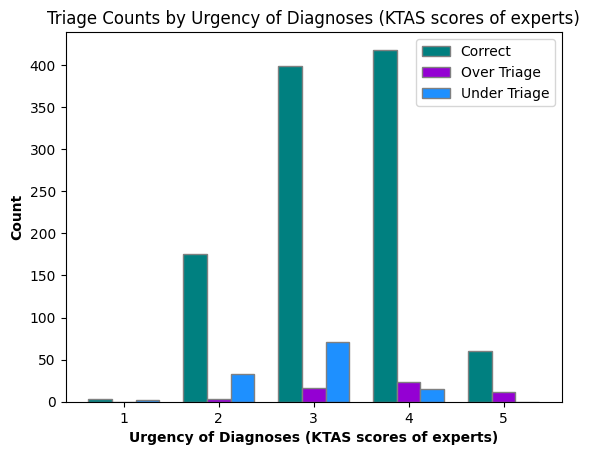

In [12]:
#
# Correct,3,176,399,418,60
# Over triage,0,3,16,24,12
# Under triage,2,33,71,15,0

import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['1', '2', '3', '4', '5']
correct = [3, 176, 399, 418, 60]
over_triage = [0, 3, 16, 24, 12]
under_triage = [2, 33, 71, 15, 0]

# Define the width of the bars
bar_width = 0.25

# Set the positions of the bars on the x-axis
r1 = np.arange(len(correct))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the bars
plt.bar(r1, correct, color='teal', width=bar_width, edgecolor='grey', label='Correct')
plt.bar(r2, over_triage, color='darkviolet', width=bar_width, edgecolor='grey', label='Over Triage')
plt.bar(r3, under_triage, color='dodgerblue', width=bar_width, edgecolor='grey', label='Under Triage')

# Add labels, title, and legend
plt.xlabel('Urgency of Diagnoses (KTAS scores of experts)', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(correct))], categories)
plt.title('Triage Counts by Urgency of Diagnoses (KTAS scores of experts)')
plt.legend()

# Show the plot
plt.show()



# Models

# SVM - Vitals Taken (All Features)

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Data preprocessing (double check)
df_english.dropna(inplace=True)

# Separate features and target variable
X = df_english.drop(['mistriage'], axis=1)
y = df_english['mistriage']

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X)

# Normalize/Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model training with probability estimates
svm_model = SVC(kernel='linear', probability=True)

# Perform k-fold cross-validation
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5)

# Binarize the output for all features
y_test_bin_all = label_binarize(y_test, classes=[0, 1, 2])

print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", round(cv_scores.mean() * 100, 2), "%")

Cross-validation scores: [0.87564767 0.9015544  0.87046632 0.9119171  0.88601036]
Average cross-validation score: 88.91 %


In [43]:
# Model evaluation
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
y_probs_all_features = svm_model.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy * 100, 2), "%")

report = classification_report(y_test, y_pred, output_dict=True)
precision = report['macro avg']['precision']
f1_score = report['macro avg']['f1-score']
sensitivity = report['macro avg']['recall']
specificity = report['weighted avg']['recall']

print("Precision:", round(precision * 100, 2), "%")
print("F1 Score:", round(f1_score * 100, 2), "%")
print("Sensitivity:", round(sensitivity * 100, 2), "%")
print("Specificity:", round(specificity * 100, 2), "%")


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 89.67 %
Precision: 56.92 %
F1 Score: 53.2 %
Sensitivity: 50.89 %
Specificity: 89.67 %
Confusion Matrix:
[[202   3   3]
 [  6   0   1]
 [ 12   0  15]]


# SVM - No Vitals Taken (Selected Columns)

In [15]:
# Data preprocessing
# Drop rows with missing values
df_english.dropna(inplace=True)

# Specify columns for model training
selected_columns = ['Sex', 'Arrival mode', 'Injury', 'Chief_complain', 'Pain', 'Diagnosis in ED', 'Length of stay_min', 'Disposition', 'NRS_pain']

# Separate features and target variable
X = df_english[selected_columns]
y = df_english['mistriage']

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X)

# Normalize/Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model training with probability estimates
svm_model = SVC(kernel='linear', probability=True)

# Perform k-fold cross-validation
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5)

# Binarize the output for all features
y_test_bin_selected = label_binarize(y_test, classes=[0, 1, 2])


print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", round(cv_scores.mean() * 100, 2), "%")

Cross-validation scores: [0.78756477 0.83937824 0.8238342  0.83419689 0.77720207]
Average cross-validation score: 81.24 %


In [16]:
# Model evaluation
svm_model.fit(X_train, y_train)  # Train on the entire training set
y_pred = svm_model.predict(X_test)
y_probs_selected_features = svm_model.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy * 100, 2), "%")

report = classification_report(y_test, y_pred, output_dict=True)
precision = report['macro avg']['precision']
f1_score = report['macro avg']['f1-score']
sensitivity = report['macro avg']['recall']
specificity = report['weighted avg']['recall']

print("Precision:", round(precision * 100, 2), "%")
print("F1 Score:", round(f1_score * 100, 2), "%")
print("Sensitivity:", round(sensitivity * 100, 2), "%")
print("Specificity:", round(specificity * 100, 2), "%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 83.88 %
Precision: 41.21 %
F1 Score: 37.45 %
Sensitivity: 36.83 %
Specificity: 83.88 %
Confusion Matrix:
[[199   2   7]
 [  7   0   0]
 [ 22   1   4]]


# ROC Curves for SVM Models

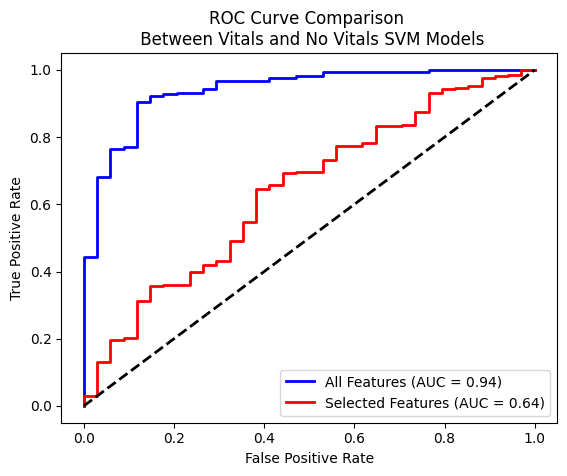

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Plot ROC curve for all features
fpr_all, tpr_all, _ = roc_curve(y_test_bin_all[:, 0], y_probs_all_features[:, 0])
roc_auc_all = roc_auc_score(y_test_bin_all[:, 0], y_probs_all_features[:, 0])
plt.plot(fpr_all, tpr_all, color='blue', lw=2, label=f'All Features (AUC = {roc_auc_all:0.2f})')

# Plot ROC curve for selected features
fpr_sel, tpr_sel, _ = roc_curve(y_test_bin_selected[:, 0], y_probs_selected_features[:, 0])
roc_auc_sel = roc_auc_score(y_test_bin_selected[:, 0], y_probs_selected_features[:, 0])
plt.plot(fpr_sel, tpr_sel, color='red', lw=2, label=f'Selected Features (AUC = {roc_auc_sel:0.2f})')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison \n Between Vitals and No Vitals SVM Models')
plt.legend(loc='lower right')
plt.grid(False)

# Show plot
plt.show()


# Random Forest - Vitals Taken (All Features)

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt


# Data preprocessing (double check)
df_english.dropna(inplace=True)

# Separate features and target variable
X = df_english.drop(['mistriage'], axis=1)
y = df_english['mistriage']

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X)

# Normalize/Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model training with probability estimates
rf_model_all = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform k-fold cross-validation
cv_scores = cross_val_score(rf_model_all, X_train, y_train, cv=5)

# Binarize the output for all features
y_test_bin_all = label_binarize(y_test, classes=[0, 1, 2])

print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", round(cv_scores.mean() * 100, 2), "%")


Cross-validation scores: [0.94300518 0.94300518 0.92746114 0.93264249 0.9119171 ]
Average cross-validation score: 93.16 %


In [46]:
# Model evaluation
rf_model_all.fit(X_train, y_train)
y_pred = rf_model_all.predict(X_test)
y_probs_all_features = rf_model_all.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy * 100, 2), "%")

report = classification_report(y_test, y_pred, output_dict=True)
precision = report['macro avg']['precision']
f1_score = report['macro avg']['f1-score']
sensitivity = report['macro avg']['recall']
specificity = report['weighted avg']['recall']

print("Precision:", round(precision * 100, 2), "%")
print("F1 Score:", round(f1_score * 100, 2), "%")
print("Sensitivity:", round(sensitivity * 100, 2), "%")
print("Specificity:", round(specificity * 100, 2), "%")


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 97.11 %
Precision: 98.91 %
F1 Score: 79.65 %
Sensitivity: 73.72 %
Specificity: 97.11 %
Confusion Matrix:
[[208   0   0]
 [  5   2   0]
 [  2   0  25]]


# Random Forest - No Vitals Taken (Selected Columns)



In [20]:
# Data preprocessing
# Drop rows with missing values
df_english.dropna(inplace=True)

# Specify columns for model training
selected_columns = ['Sex', 'Arrival mode', 'Injury', 'Chief_complain', 'Pain', 'Diagnosis in ED', 'Length of stay_min', 'Disposition', 'NRS_pain']

# Separate features and target variable
X = df_english[selected_columns]
y = df_english['mistriage']

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X)

# Normalize/Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model training with probability estimates
rf_model_selected = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform k-fold cross-validation
cv_scores = cross_val_score(rf_model_selected, X_train, y_train, cv=5)

# Binarize the output for all features
y_test_bin_selected = label_binarize(y_test, classes=[0, 1, 2])


print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", round(cv_scores.mean() * 100, 2), "%")

Cross-validation scores: [0.88082902 0.88601036 0.86528497 0.86010363 0.85492228]
Average cross-validation score: 86.94 %


In [21]:
# Model evaluation
rf_model_selected.fit(X_train, y_train)
y_pred = rf_model_selected.predict(X_test)
y_probs_selected_features = rf_model_selected.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy * 100, 2), "%")

report = classification_report(y_test, y_pred, output_dict=True)
precision = report['macro avg']['precision']
f1_score = report['macro avg']['f1-score']
sensitivity = report['macro avg']['recall']
specificity = report['weighted avg']['recall']

print("Precision:", round(precision * 100, 2), "%")
print("F1 Score:", round(f1_score * 100, 2), "%")
print("Sensitivity:", round(sensitivity * 100, 2), "%")
print("Specificity:", round(specificity * 100, 2), "%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 88.02 %
Precision: 57.93 %
F1 Score: 42.92 %
Sensitivity: 40.58 %
Specificity: 88.02 %
Confusion Matrix:
[[207   0   1]
 [  7   0   0]
 [ 21   0   6]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# ROC Curves for Random Forest Models

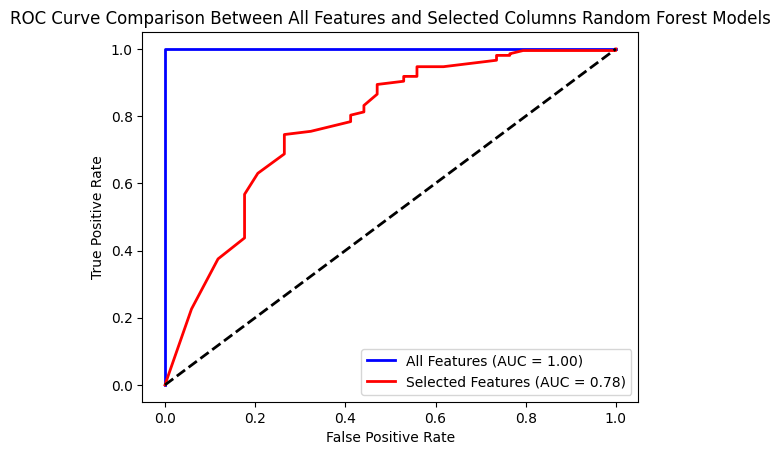

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Plot ROC curve for all features
fpr_all, tpr_all, _ = roc_curve(y_test_bin_all[:, 0], y_probs_all_features[:, 0])
roc_auc_all = roc_auc_score(y_test_bin_all[:, 0], y_probs_all_features[:, 0])
plt.plot(fpr_all, tpr_all, color='blue', lw=2, label=f'All Features (AUC = {roc_auc_all:0.2f})')

# Plot ROC curve for selected features
fpr_sel, tpr_sel, _ = roc_curve(y_test_bin_selected[:, 0], y_probs_selected_features[:, 0])
roc_auc_sel = roc_auc_score(y_test_bin_selected[:, 0], y_probs_selected_features[:, 0])
plt.plot(fpr_sel, tpr_sel, color='red', lw=2, label=f'Selected Features (AUC = {roc_auc_sel:0.2f})')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison Between All Features and Selected Columns Random Forest Models')
plt.legend(loc='lower right')
plt.grid(False)

# Show plot
plt.show()

# Logistic Regression - Vitals Taken (All Features)

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Data preprocessing (double check)
df_english.dropna(inplace=True)

# Separate features and target variable
X = df_english.drop(['mistriage'], axis=1)
y = df_english['mistriage']

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X)

# Normalize/Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model training with probability estimates
logistic_model_all = LogisticRegression()

# Perform k-fold cross-validation
cv_scores = cross_val_score(logistic_model_all, X_train, y_train, cv=5)

# Binarize the output for all features
y_test_bin_all = label_binarize(y_test, classes=[0, 1, 2])

print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", round(cv_scores.mean() * 100, 2), "%")


Cross-validation scores: [0.87564767 0.89637306 0.87564767 0.89637306 0.87046632]
Average cross-validation score: 88.29 %


In [49]:
# Model evaluation
logistic_model_all.fit(X_train, y_train)
y_pred = logistic_model_all.predict(X_test)
y_probs_all_features = logistic_model_all.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy * 100, 2), "%")

report = classification_report(y_test, y_pred, output_dict=True)
precision = report['macro avg']['precision']
f1_score = report['macro avg']['f1-score']
sensitivity = report['macro avg']['recall']
specificity = report['weighted avg']['recall']

print("Precision:", round(precision * 100, 2), "%")
print("F1 Score:", round(f1_score * 100, 2), "%")
print("Sensitivity:", round(sensitivity * 100, 2), "%")
print("Specificity:", round(specificity * 100, 2), "%")


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 90.5 %
Precision: 58.41 %
F1 Score: 53.85 %
Sensitivity: 51.21 %
Specificity: 90.5 %
Confusion Matrix:
[[204   2   2]
 [  6   0   1]
 [ 12   0  15]]


# Logistic Regression - No Vitals Taken (Selected Columns)

In [36]:
# Data preprocessing
# Drop rows with missing values
df_english.dropna(inplace=True)

# Specify columns for model training
selected_columns = ['Sex', 'Arrival mode', 'Injury', 'Chief_complain', 'Pain', 'Diagnosis in ED', 'Length of stay_min', 'Disposition', 'NRS_pain']

# Separate features and target variable
X = df_english[selected_columns]
y = df_english['mistriage']

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X)

# Normalize/Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model training with probability estimates
logistic_model_selected = LogisticRegression(max_iter=1000)

# Perform k-fold cross-validation
cv_scores = cross_val_score(logistic_model_selected, X_train, y_train, cv=5)

# Binarize the output for all features
y_test_bin_selected = label_binarize(y_test, classes=[0, 1, 2])


print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", round(cv_scores.mean() * 100, 2), "%")


Cross-validation scores: [0.8238342  0.84455959 0.80310881 0.86010363 0.79792746]
Average cross-validation score: 82.59 %


In [32]:
# Model evaluation
logistic_model_selected.fit(X_train, y_train)
y_pred = logistic_model_selected.predict(X_test)
y_probs_selected_features = logistic_model_selected.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy * 100, 2), "%")

report = classification_report(y_test, y_pred, output_dict=True)
precision = report['macro avg']['precision']
f1_score = report['macro avg']['f1-score']
sensitivity = report['macro avg']['recall']
specificity = report['weighted avg']['recall']

print("Precision:", round(precision * 100, 2), "%")
print("F1 Score:", round(f1_score * 100, 2), "%")
print("Sensitivity:", round(sensitivity * 100, 2), "%")
print("Specificity:", round(specificity * 100, 2), "%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 84.3 %
Precision: 45.0 %
F1 Score: 41.58 %
Sensitivity: 40.21 %
Specificity: 84.3 %
Confusion Matrix:
[[197   4   7]
 [  6   0   1]
 [ 20   0   7]]


# ROC Curves for Logistic Regression Models

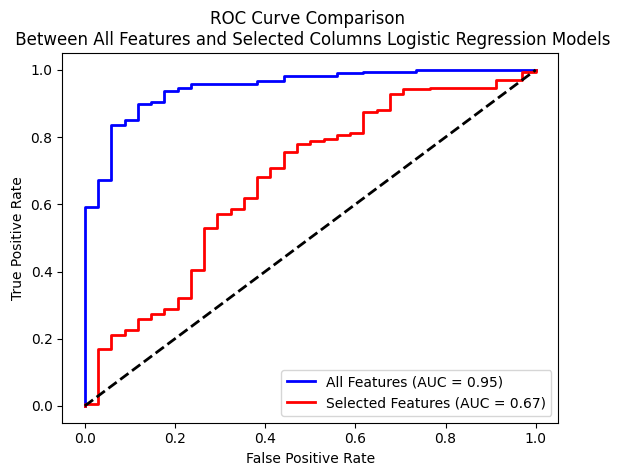

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Plot ROC curve for all features
fpr_all, tpr_all, _ = roc_curve(y_test_bin_all[:, 0], y_probs_all_features[:, 0])
roc_auc_all = roc_auc_score(y_test_bin_all[:, 0], y_probs_all_features[:, 0])
plt.plot(fpr_all, tpr_all, color='blue', lw=2, label=f'All Features (AUC = {roc_auc_all:0.2f})')

# Plot ROC curve for selected features
fpr_sel, tpr_sel, _ = roc_curve(y_test_bin_selected[:, 0], y_probs_selected_features[:, 0])
roc_auc_sel = roc_auc_score(y_test_bin_selected[:, 0], y_probs_selected_features[:, 0])
plt.plot(fpr_sel, tpr_sel, color='red', lw=2, label=f'Selected Features (AUC = {roc_auc_sel:0.2f})')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison \n Between All Features and Selected Columns Logistic Regression Models')
plt.legend(loc='lower right')
plt.grid(False)

# Show plot
plt.show()

# k Nearest Neighbors - Vitals Taken (All Features)

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Data preprocessing (double check)
df_english.dropna(inplace=True)

# Separate features and target variable
X = df_english.drop(['mistriage'], axis=1)
y = df_english['mistriage']

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X)

# Normalize/Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model training
knn_model_all = KNeighborsClassifier(n_neighbors=5)

# Perform k-fold cross-validation
cv_scores = cross_val_score(knn_model_all, X_train, y_train, cv=5)

# Binarize the output for all features
y_test_bin_all = label_binarize(y_test, classes=[0, 1, 2])

print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", round(cv_scores.mean() * 100, 2), "%")

Cross-validation scores: [0.86010363 0.86528497 0.85492228 0.85492228 0.84974093]
Average cross-validation score: 85.7 %


In [51]:
# Model evaluation
knn_model_all.fit(X_train, y_train)
y_pred = knn_model_all.predict(X_test)
y_probs_all_features = knn_model_all.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy * 100, 2), "%")

report = classification_report(y_test, y_pred, output_dict=True)
precision = report['macro avg']['precision']
f1_score = report['macro avg']['f1-score']
sensitivity = report['macro avg']['recall']
specificity = report['weighted avg']['recall']

print("Precision:", round(precision * 100, 2), "%")
print("F1 Score:", round(f1_score * 100, 2), "%")
print("Sensitivity:", round(sensitivity * 100, 2), "%")
print("Specificity:", round(specificity * 100, 2), "%")


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 85.95 %
Precision: 28.65 %
F1 Score: 30.81 %
Sensitivity: 33.33 %
Specificity: 85.95 %
Confusion Matrix:
[[208   0   0]
 [  7   0   0]
 [ 27   0   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# k Nearest Neighbors - No Vitals Taken (Selected Columns)

In [52]:
# Data preprocessing
# Drop rows with missing values
df_english.dropna(inplace=True)

# Specify columns for model training
selected_columns = ['Sex', 'Arrival mode', 'Injury', 'Chief_complain', 'Pain', 'Diagnosis in ED', 'Length of stay_min', 'Disposition', 'NRS_pain']

# Separate features and target variable
X = df_english[selected_columns]
y = df_english['mistriage']

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X)

# Normalize/Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model training
knn_model_selected = KNeighborsClassifier(n_neighbors=5)

# Perform k-fold cross-validation
cv_scores = cross_val_score(knn_model_selected, X_train, y_train, cv=5)

# Binarize the output for all features
y_test_bin_selected = label_binarize(y_test, classes=[0, 1, 2])


print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", round(cv_scores.mean() * 100, 2), "%")

Cross-validation scores: [0.86010363 0.86010363 0.85492228 0.84974093 0.86010363]
Average cross-validation score: 85.7 %


In [53]:
# Model evaluation
knn_model_selected.fit(X_train, y_train)
y_pred = knn_model_selected.predict(X_test)
y_probs_all_features = knn_model_selected.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy * 100, 2), "%")

report = classification_report(y_test, y_pred, output_dict=True)
precision = report['macro avg']['precision']
f1_score = report['macro avg']['f1-score']
sensitivity = report['macro avg']['recall']
specificity = report['weighted avg']['recall']

print("Precision:", round(precision * 100, 2), "%")
print("F1 Score:", round(f1_score * 100, 2), "%")
print("Sensitivity:", round(sensitivity * 100, 2), "%")
print("Specificity:", round(specificity * 100, 2), "%")


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 85.95 %
Precision: 45.42 %
F1 Score: 33.1 %
Sensitivity: 34.41 %
Specificity: 85.95 %
Confusion Matrix:
[[207   0   1]
 [  7   0   0]
 [ 26   0   1]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# ROC Curves for k Nearest Neighbor Models

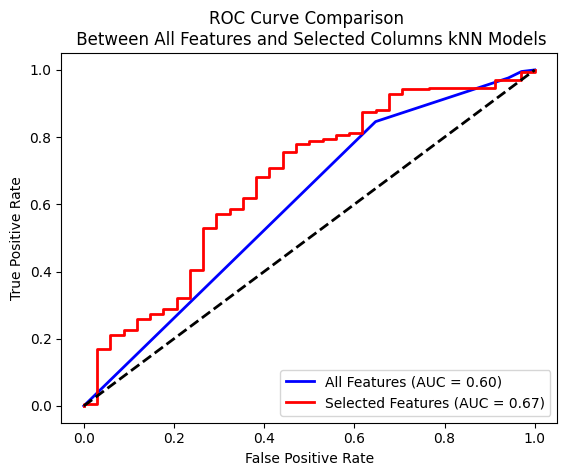

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Plot ROC curve for all features
fpr_all, tpr_all, _ = roc_curve(y_test_bin_all[:, 0], y_probs_all_features[:, 0])
roc_auc_all = roc_auc_score(y_test_bin_all[:, 0], y_probs_all_features[:, 0])
plt.plot(fpr_all, tpr_all, color='blue', lw=2, label=f'All Features (AUC = {roc_auc_all:0.2f})')

# Plot ROC curve for selected features
fpr_sel, tpr_sel, _ = roc_curve(y_test_bin_selected[:, 0], y_probs_selected_features[:, 0])
roc_auc_sel = roc_auc_score(y_test_bin_selected[:, 0], y_probs_selected_features[:, 0])
plt.plot(fpr_sel, tpr_sel, color='red', lw=2, label=f'Selected Features (AUC = {roc_auc_sel:0.2f})')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison \n Between All Features and Selected Columns kNN Models')
plt.legend(loc='lower right')
plt.grid(False)

# Show plot
plt.show()